# Clothes Classification with Support Vector Machines

In this notebook we are going to explore the use of Support Vector Machines (SVM) for image classification. We will use a new version of the famous MNIST dataset (the original is a dataset of handwritten digits). The version we are going to use is called Fashion MNIST (https://pravarmahajan.github.io/fashion/) and is a dataset of small images of clothes and accessories.



The dataset labels are the following:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

## TODO: Insert your surname, name and ID number

Student surname: Saccaro

Student name: Lorenzo
    
ID: 1123705

In [1]:
#load the required packages

%matplotlib inline  

import time
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt

import sklearn
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
import sklearn.metrics as skm

In [2]:
# helper function to load Fashion MNIST dataset
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

In [3]:
#fix your ID ("numero di matricola") and the seed for random generator (as usual you can try different seeds)
ID = 1123705 # place a random seed
np.random.seed(ID)

In [4]:
#load the Fashion MNIST dataset from the 'data' folder and let's normalize the features so that each value is in [0,1] 

X, y = load_mnist('data', kind='train')
# rescale the data
X, y = X / 255., y # original pixel values are between 0 and 255
print(X.shape, y.shape)

(60000, 784) (60000,)


Now split into training and test. Make sure that each label is present at least 10 times
in training. If it is not, then keep adding permutations to the initial data until this 
happens.

In [5]:
# Random permute the data and split into training and test taking the first 600
# data samples as training and 4000 samples as test
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

# try increase 
m_training = 600 
m_test = 4000     

X_train, X_test = X[:m_training], X[m_training:m_training+m_test:]
y_train, y_test = y[:m_training], y[m_training:m_training+m_test:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)


Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [57 63 53 59 50 63 66 60 69 60]


In [6]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

INPUT:


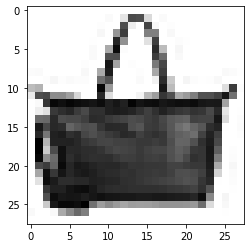

LABEL: 8
INPUT:


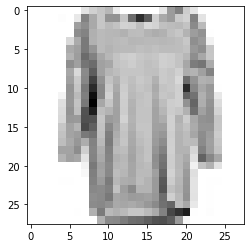

LABEL: 2
INPUT:


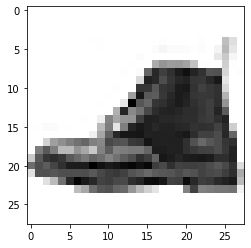

LABEL: 9
INPUT:


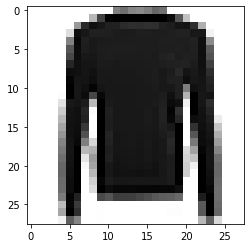

LABEL: 2


In [7]:
#let's try the plotting function
plot_input(X_train,y_train,5)
plot_input(X_test,y_test,50)
plot_input(X_test,y_test,500)
plot_input(X_test,y_test,700)

## TO DO 1
Use a SVM classifier with cross validation to pick a model. Use a 4-fold cross-validation. Let's start with a Linear kernel:

In [8]:
#import SVC
from sklearn.svm import SVC
#import for Cross-Validation
from sklearn.model_selection import GridSearchCV 

# parameters for linear SVM
parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

#train linear SVM
linear_SVM = GridSearchCV(estimator=SVC(kernel='linear',break_ties=True),param_grid=parameters,n_jobs=-1,cv=4)
linear_SVM.fit(X_train,y_train)

results = pd.DataFrame(linear_SVM.cv_results_)
print ('RESULTS FOR LINEAR KERNEL')

print("Best parameters set found:")
print(linear_SVM.best_params_)

print("Score with best parameters:")
print(linear_SVM.best_score_)

print("All scores on the grid:")
for val in results[["params","mean_test_score"]].values:
    print("parameters:",val[0], "score:", val[1])



RESULTS FOR LINEAR KERNEL
Best parameters set found:
{'C': 0.1}
Score with best parameters:
0.8033333333333333
All scores on the grid:
parameters: {'C': 0.001} score: 0.5800000000000001
parameters: {'C': 0.01} score: 0.75
parameters: {'C': 0.1} score: 0.8033333333333333
parameters: {'C': 1} score: 0.8016666666666667
parameters: {'C': 10} score: 0.8016666666666667
parameters: {'C': 100} score: 0.8016666666666667


## TO DO 2
Pick a model for the Polynomial kernel with degree=2:

In [9]:
# parameters for poly with degree 2 kernel
parameters = {'C': [0.05, 0.5, 5],'gamma':[0.05,0.5,5.]}

#run SVM with poly of degree 2 kernel
poly2_SVM = GridSearchCV(estimator=SVC(kernel='poly',degree=2,break_ties=True),param_grid=parameters,n_jobs=-1,cv=4)
poly2_SVM.fit(X_train,y_train)
#try with break_ties?
results = pd.DataFrame(poly2_SVM.cv_results_)
print ('RESULTS FOR POLY DEGREE=2 KERNEL')

print("Best parameters set found:")
print(poly2_SVM.best_params_)

print("Score with best parameters:")
print(poly2_SVM.best_score_)

print("All scores on the grid:")
for val in results[["params","mean_test_score"]].values:
    print("parameters:",val[0], "score:", val[1])

RESULTS FOR POLY DEGREE=2 KERNEL
Best parameters set found:
{'C': 0.05, 'gamma': 0.5}
Score with best parameters:
0.775
All scores on the grid:
parameters: {'C': 0.05, 'gamma': 0.05} score: 0.7349999999999999
parameters: {'C': 0.05, 'gamma': 0.5} score: 0.775
parameters: {'C': 0.05, 'gamma': 5.0} score: 0.7733333333333334
parameters: {'C': 0.5, 'gamma': 0.05} score: 0.7733333333333332
parameters: {'C': 0.5, 'gamma': 0.5} score: 0.7733333333333334
parameters: {'C': 0.5, 'gamma': 5.0} score: 0.7733333333333334
parameters: {'C': 5, 'gamma': 0.05} score: 0.775
parameters: {'C': 5, 'gamma': 0.5} score: 0.7733333333333334
parameters: {'C': 5, 'gamma': 5.0} score: 0.7733333333333334


## TO DO 3

Now let's try a higher degree for the polynomial kernel (e.g., 4th degree).

In [10]:
# parameters for poly with higher degree kernel
parameters = {'C': [0.05, 0.5, 5],'gamma':[0.05,0.5,5.]}

#run SVM with poly of higher degree kernel
degree = 4
poly_degree_SVM = GridSearchCV(estimator=SVC(kernel='poly',degree=degree,break_ties=True),param_grid=parameters,n_jobs=-1,cv=4)
poly_degree_SVM.fit(X_train,y_train)

results = pd.DataFrame(poly_degree_SVM.cv_results_)
print ('RESULTS FOR POLY DEGREE=', degree, ' KERNEL')

print("Best parameters set found:")
print(poly_degree_SVM.best_params_)

print("Score with best parameters:")
print(poly_degree_SVM.best_score_)

print("All scores on the grid:")
for val in results[["params","mean_test_score"]].values:
    print("parameters:",val[0], "score:", val[1])


RESULTS FOR POLY DEGREE= 4  KERNEL
Best parameters set found:
{'C': 0.5, 'gamma': 0.05}
Score with best parameters:
0.7283333333333333
All scores on the grid:
parameters: {'C': 0.05, 'gamma': 0.05} score: 0.7133333333333334
parameters: {'C': 0.05, 'gamma': 0.5} score: 0.705
parameters: {'C': 0.05, 'gamma': 5.0} score: 0.705
parameters: {'C': 0.5, 'gamma': 0.05} score: 0.7283333333333333
parameters: {'C': 0.5, 'gamma': 0.5} score: 0.705
parameters: {'C': 0.5, 'gamma': 5.0} score: 0.705
parameters: {'C': 5, 'gamma': 0.05} score: 0.7200000000000001
parameters: {'C': 5, 'gamma': 0.5} score: 0.705
parameters: {'C': 5, 'gamma': 5.0} score: 0.705


## TO DO 4
Pick a model for the Radial Basis Function kernel:

In [11]:
# parameters for rbf SVM
parameters = {'C': [0.5, 5, 50, 500],'gamma':[0.005, 0.05, 0.5,5]}

#run SVM with rbf kernel
rbf_SVM = GridSearchCV(estimator=SVC(kernel='rbf',break_ties=True),param_grid=parameters,n_jobs=-1,cv=4)
rbf_SVM.fit(X_train,y_train)
# ADD YOUR CODE

results = pd.DataFrame(rbf_SVM.cv_results_)
print ('RESULTS FOR rbf KERNEL')

print("Best parameters set found:")
print(rbf_SVM.best_params_)

print("Score with best parameters:")
print(rbf_SVM.best_score_)

print("All scores on the grid:")
for val in results[["params","mean_test_score"]].values:
    print("parameters:",val[0], "score:", val[1])


RESULTS FOR rbf KERNEL
Best parameters set found:
{'C': 5, 'gamma': 0.005}
Score with best parameters:
0.805
All scores on the grid:
parameters: {'C': 0.5, 'gamma': 0.005} score: 0.725
parameters: {'C': 0.5, 'gamma': 0.05} score: 0.6849999999999999
parameters: {'C': 0.5, 'gamma': 0.5} score: 0.115
parameters: {'C': 0.5, 'gamma': 5} score: 0.115
parameters: {'C': 5, 'gamma': 0.005} score: 0.805
parameters: {'C': 5, 'gamma': 0.05} score: 0.77
parameters: {'C': 5, 'gamma': 0.5} score: 0.12666666666666665
parameters: {'C': 5, 'gamma': 5} score: 0.115
parameters: {'C': 50, 'gamma': 0.005} score: 0.7966666666666667
parameters: {'C': 50, 'gamma': 0.05} score: 0.77
parameters: {'C': 50, 'gamma': 0.5} score: 0.12666666666666665
parameters: {'C': 50, 'gamma': 5} score: 0.115
parameters: {'C': 500, 'gamma': 0.005} score: 0.7966666666666667
parameters: {'C': 500, 'gamma': 0.05} score: 0.77
parameters: {'C': 500, 'gamma': 0.5} score: 0.12666666666666665
parameters: {'C': 500, 'gamma': 5} score: 0.1

## QUESTION 1
What do you observe when using linear, polynomial and RBF kernels on this dataset ?

RBF and linear kernels deliver the best results: with this particular seed rbf has the lead but with different ones linear can be on top or they are tied. Scores for these two kernels are around 0.80 for the best parameter values. Polynomial kernels have inferior results: increasing the degree of the polynomial leads to lower scores (tried also with degree>4). 


## TO DO 5
Report here the best SVM kernel and parameters

In [12]:
#get training and test error for the best SVM model from CV
best_SVM = SVC(kernel='rbf', C=5, gamma=0.005, break_ties=True) # USE YOUR OPTIMAL PARAMETERS
best_SVM.fit(X_train,y_train)

training_error = 1-best_SVM.score(X_train,y_train)
test_error = 1-best_SVM.score(X_test,y_test)
# (error is 1 - svm.score)

print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)

Best SVM training error: 0.061667
Best SVM test error: 0.198000


## TO DO 6

Analyze how the classification boundaries depend on the C parameter

In [13]:
# Function to plot the data and classification boundaries. 


def plot_data(model, X_train, y_train, X_test, y_test, train_acc, test_acc):

    def make_meshgrid(x, y, h=.02):
        x_min, x_max = x.min() - abs(0.1*x.min()), x.max() + abs(0.1*x.min())
        y_min, y_max = y.min() - abs(0.1*y.min()), y.max() + abs(0.1*y.min())
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        return xx, yy

    def plot_contours(ax, clf, xx, yy, **params):
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        out = ax.contourf(xx, yy, Z, **params)
        return out
    
    
    
    # Plot
    fig, ax = plt.subplots(1,2,figsize=(15,5))

    # Training set
    X0, X1 = X_train_pca[:, 0], X_train_pca[:, 1]
    xx, yy = make_meshgrid(X0, X1)
    plot_contours(ax[0], model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax[0].scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=35, edgecolors='k')
    ax[0].set_xticks(())
    ax[0].set_yticks(())
    ax[0].set_title('Training data, C={:.0e}, model accuracy={:.3f}'.format(model.__dict__['C'],train_acc))
    
    # Test set
    X0, X1 = X_test_pca[:, 0], X_test_pca[:, 1]
    xx, yy = make_meshgrid(X0, X1)
    plot_contours(ax[1], model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax[1].scatter(X0, X1, c=y_test, cmap=plt.cm.coolwarm, s=35, edgecolors='k')
    ax[1].set_xticks(())
    ax[1].set_yticks(())
    ax[1].set_title('Test data, C={:.0e}, model accuracy={:.3f}'.format(model.__dict__['C'],test_acc))
    
    plt.show()

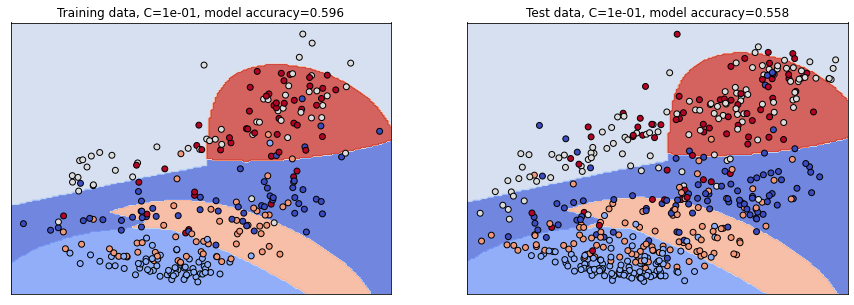

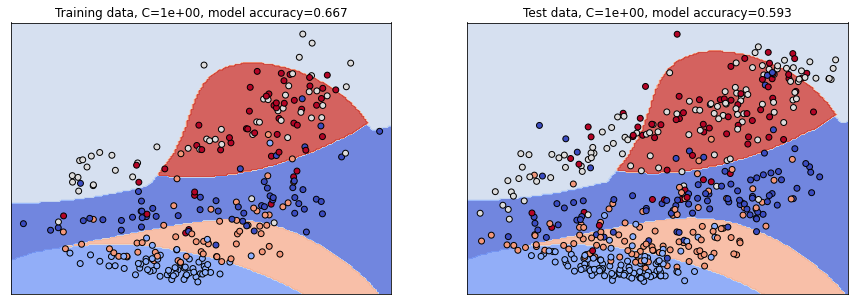

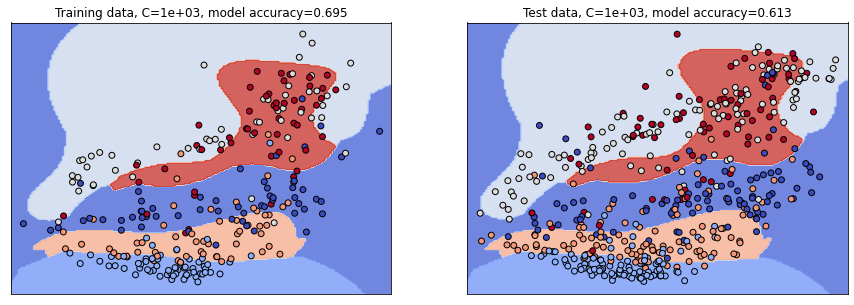

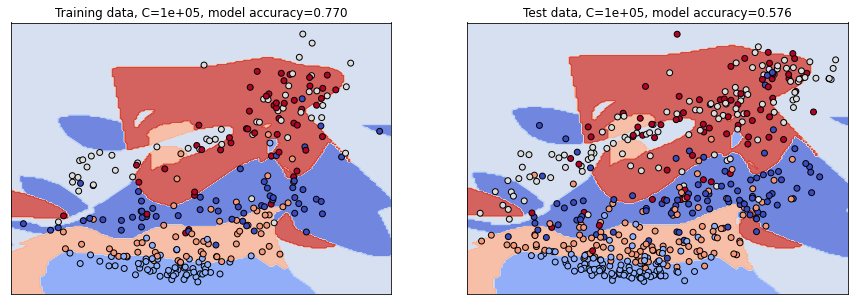

In [14]:
# Too many test samples for visualization, plot only some of them
m_test = 1000
p = np.random.permutation(X_test.shape[0])[:m_test]
X_test_red, y_test_red = X_test[p,:], y_test[p]

# Perform classification only on subset of original classes for better visualization

class_list = [0,1,2,3,4] #YOU CAN TRY TO CHANGE THE CLASSES

train_idxs = [i for i in range(len(y_train)) if y_train[i] in class_list]   
test_idxs = [i for i in range(len(y_test_red)) if y_test_red[i] in class_list] 
X_train_plot = X_train[train_idxs,:]
X_test_plot = X_test_red[test_idxs,:] 
y_train_plot = y_train[train_idxs]
y_test_plot = y_test_red[test_idxs] 


# The dimensionality is reduced to 2 for visualization using PCA
# PCA: Reduce the dimensionality trying to preserve the information content. 
# PCA will be the topic of one of the very last lectures

# Reduce X dimensionality to 2 for visualization
pca = PCA(n_components=2, svd_solver='randomized', whiten=True).fit(X_train)
X_train_pca, X_test_pca = pca.transform(X_train_plot), pca.transform(X_test_plot)


C_list = [1e-1, 1, 1e3, 1e5]
gamma = 0.5

# Fit the prediction model on train_plot data futher reduced with PCA, 
# then classify with different prediction models and plot data
# Use RBF kernel 

for C in C_list:
    my_svm = SVC(kernel='rbf', C=C, gamma=gamma, break_ties=True)
    my_svm.fit(X_train_pca, y_train_plot)
    
    train_acc = my_svm.score(X_train_pca,y_train_plot)
    test_acc = my_svm.score(X_test_pca,y_test_plot)
    # ADD CODE TO TRAIN SVM (use the PCA reduced data)
    
    plot_data(my_svm, X_train_pca, y_train_plot, X_test_pca, y_test_plot, train_acc, test_acc)

## QUESTION 2
How do the shape of the boundaries changes when trying different values of C ?

Small values of C (which correspond to large values of lambda) deliver solutions with connected regions: the boundaries are such that the margin between different areas is maximized at the cost of a higher train error.

Increasing the value of C, the boundaries are stretched trying to include more correctly classified points (the training error decreases while C gets bigger) up to the point where the regions are no longer connected. 

The test error shows that a good balance between an "aggressive" (large C) and "conservative" (small C) behavior is the way to go. 

## TO DO 7

Analyze how the gamma parameter (inversely proportional to standard deviation of Gaussian Kernel) impact the performances of the classifier

In [15]:
#Test with different values of gamma

# Set gamma values
gamma_values = np.logspace(-5,2,8)
print(gamma_values)


[1.e-05 1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02]


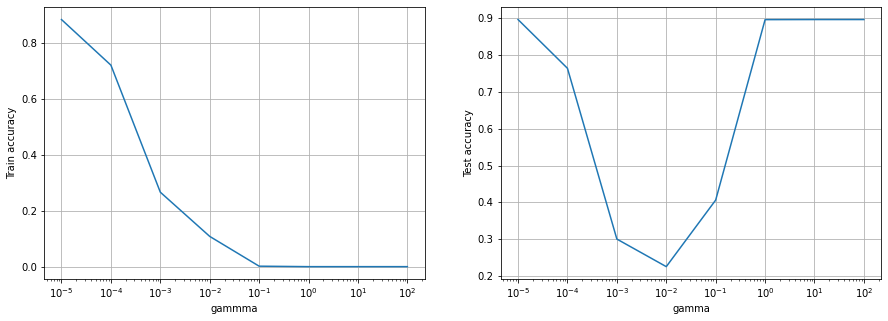

In [16]:
# Try the SVM with the previously set values of gamma
# use rbf kernel and C=1

train_acc_list, test_acc_list = [], []

# ADD YOUR CODE TO TRAIN THE SVM MULTIPLE TIMES WITH THE DIFFERENT VALUES OF GAMMA
# PLACE THE TRAIN AND TEST ACCURACY FOR EACH TEST IN THE TRAIN AND TEST ACCURACY LISTS

for gamma in gamma_values:
    my_svm = SVC(kernel='rbf', C=1, gamma=gamma, break_ties=True)
    my_svm.fit(X_train, y_train)
    train_acc_list.append(1-my_svm.score(X_train,y_train))
    test_acc_list.append(1-my_svm.score(X_test,y_test))

# Plot
fig, ax = plt.subplots(1,2, figsize=(15,5))

ax[0].plot(gamma_values, train_acc_list)
ax[0].set_xscale('log')
ax[0].set_xlabel('gammma')
ax[0].set_ylabel('Train accuracy')
ax[0].grid(True)

ax[1].plot(gamma_values, test_acc_list)
ax[1].set_xscale('log')
ax[1].set_xlabel('gamma')
ax[1].set_ylabel('Test accuracy')
ax[1].grid(True)


plt.show()

## QUESTION 3
How do the train and test error change when changing gamma ? Which is the best value of gamma ? 
Connect your answers to the discussion about the overfitting issue.

The training error monotonically decreases with gamma until reaching zero (for gamma > 10^-1).

The test error has a minimum near 10^(-2) and while having a similar behavior as the training error for gamma < minimum, it grows back fast as gamma keeps increasing above 10^(-2). 

This behavior is typical when we are overfitting the training set. The gamma parameter controls the concept of "close" and "far" in the rbf kernel.  Small values of gamma lead to less precise  (bigger train error) but more general solution (possibly better test error) while larger gamma precisely fit the training data but lose prediction accuracy. 

The idea is to find an optimal trade-off between these two extremes: in this case, the best gamma should be searched around the minima of the test accuracy (in practice a grid search with 10^(-3) < gamma < 10^(-1)).   

## More data
Now let's do the same but using more data points for training.


Choose a new number of data points.

In [17]:
X = X[permutation]
y = y[permutation]

m_training = 1500 # TODO number of data points, adjust depending on the capabilities of your PC

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [139 169 163 154 138 155 135 163 132 152]


## TO DO 8

Let's try to use SVM with parameters obtained from the best model for $m_{training} =  1500$. Since it may take a long time to run, you can decide to just let it run for some time and stop it if it does not complete. If you decide to do this, report it in the cell below.

In [18]:
#get training and test error for the best SVM model from CV

best_SVM = SVC(kernel='rbf', C=5, gamma=0.005, break_ties=True) # USE YOUR OPTIMAL PARAMETERS
best_SVM.fit(X_train,y_train)

training_error = 1-best_SVM.score(X_train,y_train)
test_error = 1-best_SVM.score(X_test,y_test)

print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)

Best SVM training error: 0.060667
Best SVM test error: 0.171436


Just for comparison, let's also use logistic regression 

## TO DO 9 Try first without regularization (use a very large large C)¶

In [19]:
from sklearn import linear_model

logreg=linear_model.LogisticRegression(C=1e5, max_iter=100, n_jobs=-1)
logreg.fit(X_train,y_train)

training_error = 1-logreg.score(X_train,y_train)
test_error = 1-logreg.score(X_test,y_test)

print ("Best logistic regression training error: %f" % training_error)
print ("Best logistic regression test error: %f" % test_error)

Best logistic regression training error: 0.000000
Best logistic regression test error: 0.215043


## TO DO 10 Try  with regularization (use C=1)¶

In [20]:

logreg=linear_model.LogisticRegression(C=1, max_iter=100, n_jobs=-1)
logreg.fit(X_train,y_train)

training_error = 1-logreg.score(X_train,y_train)
test_error = 1-logreg.score(X_test,y_test)

print ("Best regularized logistic regression training error: %f" % training_error)
print ("Best regularized logistic regression test error: %f" % test_error)

Best regularized logistic regression training error: 0.016667
Best regularized logistic regression test error: 0.192769


## QUESTION 4
Compare and discuss:
- the results from SVM with m=600 and with m=1500 training data points. If you stopped the SVM, include such aspect in your comparison.
- the results of SVM and of Logistic Regression


SVM with m=600 and m=1500 have roughly the same training error while the test error is lower in the second case. This remains true when further increasing the value of m: the training error oscillates between 0.06 and 0.07 while the test error keeps decreasing (see values below)

m = [2000, 2500, 3000, 5000]

test_err = [0.163, 0.159, 0.152, 0.142]

LR with regularization has higher train errors while lower test errors than simple LR. This shows that without regularization LR tends to overfit the training data. Increasing m for both LR (regularized and not) leads to increased training error but decreased test error (see values below).

m = [2000, 2500, 3000, 5000]

train_err_reg = [0.026 , 0.036, 0.047, 0.061]

train_err_noreg = [0.005, 0.025, 0.034, 0.058]

test_err_reg = [0.184, 0.182, 0.178, 0.168]

test_err_noreg = [0.213, 0.207, 0.197, 0.180]

These data also show that SVM has a higher training error but lower test error than LR. This means that SVM generalizes better to unseen data (without overfitting) and so it has better prediction accuracy. 

So for this specific problem SVM is the better option. 

## TO DO 11
Plot an item of clothing that is missclassified by logistic regression and correctly classified by SVM.

In [21]:
LR_prediction = logreg.predict(X_test)# ADD CODE
SVM_prediction = best_SVM.predict(X_test)# ADD CODE

INPUT:


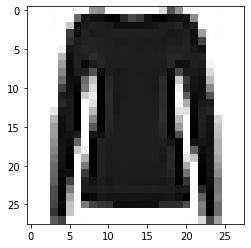

LABEL: 2
index selected: 6
label predicted by logistic regression: 4
label predicted by SVM: 2


In [22]:
index_bad_good = 0
while not (SVM_prediction[index_bad_good]==y_test[index_bad_good] and not LR_prediction[index_bad_good]==y_test[index_bad_good]):
    index_bad_good +=1
    
plot_input(X_test,y_test,index_bad_good)
print("index selected:", index_bad_good)
print("label predicted by logistic regression:", LR_prediction[index_bad_good])
print("label predicted by SVM:", SVM_prediction[index_bad_good])


## TO DO 12
Plot the confusion matrix for the SVM classifier and for logistic regression.
The confusion matrix has one column for each predicted label and one row for each true label. 
It shows for each class in the corresponding row how many samples belonging to that class gets each possible output label.
Notice that the diagonal contains the correctly classified samples, while the other cells correspond to errors.
You can obtain it with the sklearn.metrics.confusion_matrix function (see the documentation).
Try also to normalize the confusion matrix by the number of samples in each class in order to measure the accuracy on each single class.


In [23]:
np.set_printoptions(precision=2, suppress=True) # for better aligned printing of confusion matrix use floatmode='fixed'

u, counts = np.unique(y_test, return_counts=True)
print("Labels and frequencies in test set: ", counts)

confusion_SVM = skm.confusion_matrix(y_test, SVM_prediction)# ADD CODE
print("\n Confusion matrix SVM  \n \n", confusion_SVM)
print("\n Confusion matrix SVM (normalized)   \n \n", confusion_SVM /counts[:,None] )

confusion_LR =  skm.confusion_matrix(y_test, LR_prediction)# ADD CODE# ADD CODE
print("\n Confusion matrix LR  \n \n", confusion_LR)
print("\n Confusion matrix LR (normalized)   \n \n", confusion_LR /counts[:,None] )

Labels and frequencies in test set:  [5861 5831 5837 5846 5862 5845 5865 5837 5868 5848]

 Confusion matrix SVM  
 
 [[4935   20   58  330   19    4  448    1   45    1]
 [  25 5555   46  159   13    0   28    0    5    0]
 [ 114    5 4366   46  663    2  598    0   43    0]
 [ 260   60   39 5094  177    0  203    0   12    1]
 [  32   13  689  239 4389    3  473    0   24    0]
 [   2    0    0   14    0 5178    7  456   19  169]
 [1311    7  658  183  904    0 2722    1   77    2]
 [   0    0    0    0    0  255    0 5277    5  300]
 [  15    5   22   23   30   50  166   41 5506   10]
 [   0    0    2   13    1   83    2  296    2 5449]]

 Confusion matrix SVM (normalized)   
 
 [[0.84 0.   0.01 0.06 0.   0.   0.08 0.   0.01 0.  ]
 [0.   0.95 0.01 0.03 0.   0.   0.   0.   0.   0.  ]
 [0.02 0.   0.75 0.01 0.11 0.   0.1  0.   0.01 0.  ]
 [0.04 0.01 0.01 0.87 0.03 0.   0.03 0.   0.   0.  ]
 [0.01 0.   0.12 0.04 0.75 0.   0.08 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.89 0.   0.08 0. 

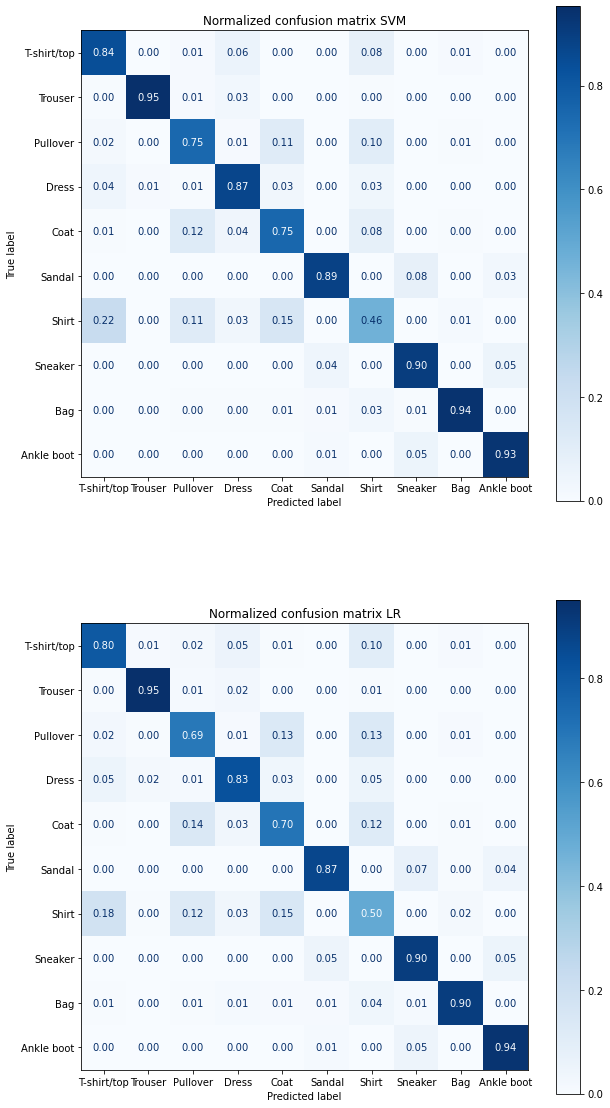

In [24]:
labels=["T-shirt/top","Trouser","Pullover","Dress", "Coat","Sandal","Shirt","Sneaker", "Bag", "Ankle boot"]
fig, ax = plt.subplots(2,1, figsize=(10,20))

skm.ConfusionMatrixDisplay(confusion_matrix=confusion_SVM/counts[:,None], display_labels=labels).plot(cmap=plt.cm.Blues,values_format='.2f',ax=ax[0]).ax_.set_title("Normalized confusion matrix SVM")
skm.ConfusionMatrixDisplay(confusion_matrix=confusion_LR/counts[:,None], display_labels=labels).plot(cmap=plt.cm.Blues,values_format='.2f',ax=ax[1]).ax_.set_title("Normalized confusion matrix LR");


## QUESTION 5
Have a look at the confusion matrices and comment on the obtained accuracies. Why some classes have lower accuracies and others an higher one ? Make some guesses on the possible causes.

In general (as seen before) SVM has slightly better scores than LR and therefore there are no big differences in the confusion matrix.

Most classes have accuracies above 0.80 (some even above 0.90) which is ok, but some have disappointing results. The worst is the classification of the shirt, with values below 50%. The main reason for this is the limits that our SVM/LR model has when trying to distinguish between similar clothes, such as shirts and t-shirt (22% of shirts are misclassified as t-shirt and 15% as coats).  Another minor reason is the fact that in the training set clothes are present in different frequencies and this determines how the model is trained.

To get better results a more sophisticated approach is needed (and/or using more data for training as seen in question 4)